# Preparação

Baixando dependências

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from statsmodels.tsa.stattools import acf

Consumir dados pelo files (runtime)

In [6]:
data = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
data.columns

FileNotFoundError: [Errno 2] No such file or directory: '/content/household_power_consumption.txt'

Consumir pelo drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/_2sem_ia/Datasets/household_power_consumption.txt', sep=';')
data.info()

/tmp/ipython-input-2242014736.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/_2sem_ia/Datasets/household_power_consumption.txt', sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Exercícios (1-20)

### 1 - Carregue o dataset e exiba as 10 primeiras linhas.

In [13]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


### 2 - Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

In [14]:
display(data[['Global_active_power','Global_reactive_power']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Global_active_power    object
 1   Global_reactive_power  object
dtypes: object(2)
memory usage: 31.7+ MB


None

A Global_active_power (Potência Ativa Global) é a energia real que é consumida pelos aparelhos elétricos para realizar trabalho útil, como ligar luzes, aquecer água, ou fazer um motor girar. É a energia que você efetivamente "usa" e pela qual geralmente paga na sua conta de luz. É medida em quilowatts (kW).

A Global_reactive_power (Potência Reativa Global) é a energia que não é convertida em trabalho útil, mas é necessária para operar equipamentos que funcionam com campos magnéticos ou elétricos, como transformadores, motores e alguns tipos de iluminação. Essa energia "circula" no sistema para manter esses campos, mas não realiza trabalho. É medida em quilovolt-amperes reativos (kVAr).

A diferença principal é que a potência ativa realiza trabalho, enquanto a potência reativa não realiza trabalho útil, mas é essencial para o funcionamento de certos equipamentos.

### 3 - Verifique se existem valores ausentes no dataset. Quantifique-os.

In [15]:
valores_ausentes = data.isnull().sum()

display(valores_ausentes)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


### 4 - Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente

In [16]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Day_of_Week'] = data['Date'].dt.day_name()

display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


### 5 - Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power

In [17]:
data_2007 = data[data['Date'].dt.year == 2007].copy()

# convertendo 'Global_active_power' para numérico, tratando erros
data_2007['Global_active_power'] = pd.to_numeric(data_2007['Global_active_power'], errors='coerce')

avg_power_2007 = data_2007.groupby(data_2007['Date'].dt.date)['Global_active_power'].mean()

display(avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


### 6 -  Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha

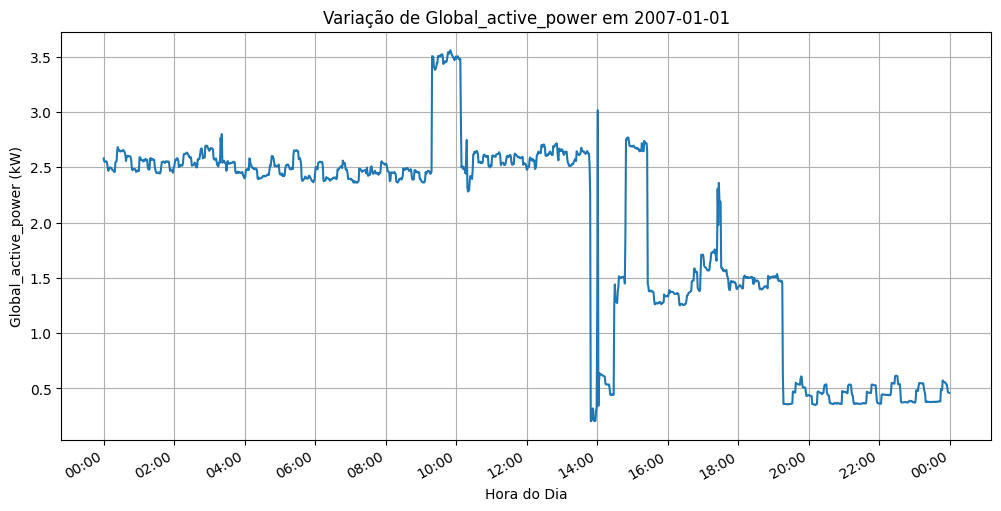

In [18]:
date_to_plot = '2007-01-01'

data_single_day = data[data['Date'] == date_to_plot].copy()

data_single_day['Datetime'] = pd.to_datetime(data_single_day['Date'].astype(str) + ' ' + data_single_day['Time'])

data_single_day['Global_active_power'] = pd.to_numeric(data_single_day['Global_active_power'], errors='coerce')

data_single_day = data_single_day.set_index('Datetime')

plt.figure(figsize=(12, 6))
plt.plot(data_single_day.index, data_single_day['Global_active_power'])
plt.title(f'Variação de Global_active_power em {date_to_plot}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

### 7 - Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

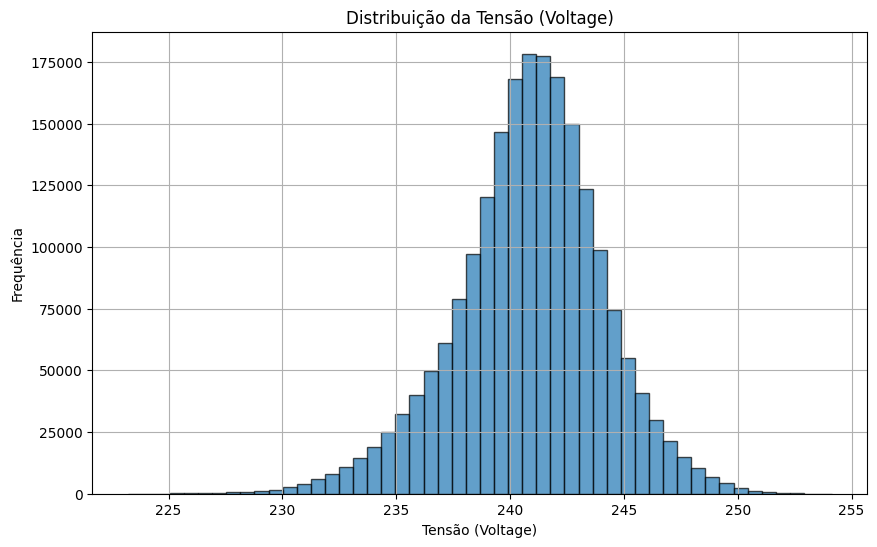

In [19]:
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(data['Voltage'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Tensão (Voltage)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### 8 - Calcule o consumo médio por mês em todo o período disponível no dataset

In [20]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

data.dropna(subset=['Date'], inplace=True)

data['AnoMes'] = data['Date'].dt.to_period('M')

data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

media_mensal_power = data.groupby('AnoMes')['Global_active_power'].mean()

display(media_mensal_power)

,Global_active_power
AnoMes,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


### 9 - Identifique o dia com maior consumo de energia ativa global (Global_active_power)

In [21]:
daily_total_power = data.groupby(data['Date'].dt.date)['Global_active_power'].sum()

day_with_highest_consumption = daily_total_power.idxmax()
highest_consumption_value = daily_total_power.max()

print(f"O dia com o maior consumo de energia ativa global foi: {day_with_highest_consumption}")
print(f"O valor do consumo nesse dia foi: {highest_consumption_value:.2f} kW")

O dia com o maior consumo de energia ativa global foi: 2006-12-23
O valor do consumo nesse dia foi: 4773.39 kW


### 10 - Compare o consumo médio de energia ativa global em dias de semana versus finais de semana

In [22]:
data['Tipo_Dia'] = data['Date'].dt.dayofweek.apply(lambda x: 'Fim de Semana' if x >= 5 else 'Dia de Semana')

media_power_por_tipo_dia = data.groupby('Tipo_Dia')['Global_active_power'].mean()

display(media_power_por_tipo_dia)

,Global_active_power
Tipo_Dia,
Dia de Semana,1.035472
Fim de Semana,1.234232


### 11 - Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity

In [23]:
correlation_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

correlation_matrix = data[correlation_cols].corr()

display(correlation_matrix)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


### 12 - Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.


In [24]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in sub_metering_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dropna(subset=sub_metering_cols, inplace=True)

data['Total_Sub_metering'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,AnoMes,Tipo_Dia,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.400,0.0,1.0,17.0,Saturday,2006-12,Fim de Semana,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.000,0.0,1.0,16.0,Saturday,2006-12,Fim de Semana,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.000,0.0,2.0,17.0,Saturday,2006-12,Fim de Semana,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.000,0.0,1.0,17.0,Saturday,2006-12,Fim de Semana,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.800,0.0,1.0,17.0,Saturday,2006-12,Fim de Semana,18.0


### 13 - . Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [25]:
media_mensal_sub_metering = data.groupby('AnoMes')['Total_Sub_metering'].mean()

meses_com_maior_sub_metering = media_mensal_sub_metering[media_mensal_sub_metering > media_mensal_power]

if not meses_com_maior_sub_metering.empty:
    print("Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    display(meses_com_maior_sub_metering)
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:


,Total_Sub_metering
AnoMes,
2006-12,10.873181
2007-01,10.423518
2007-02,9.486135
2007-03,10.212863
2007-04,6.839375
2007-05,8.452442
2007-06,7.379151
2007-07,5.697724
2007-08,6.979336


### 14 - Faça um gráfico de série temporal do Voltage para o ano de 2008

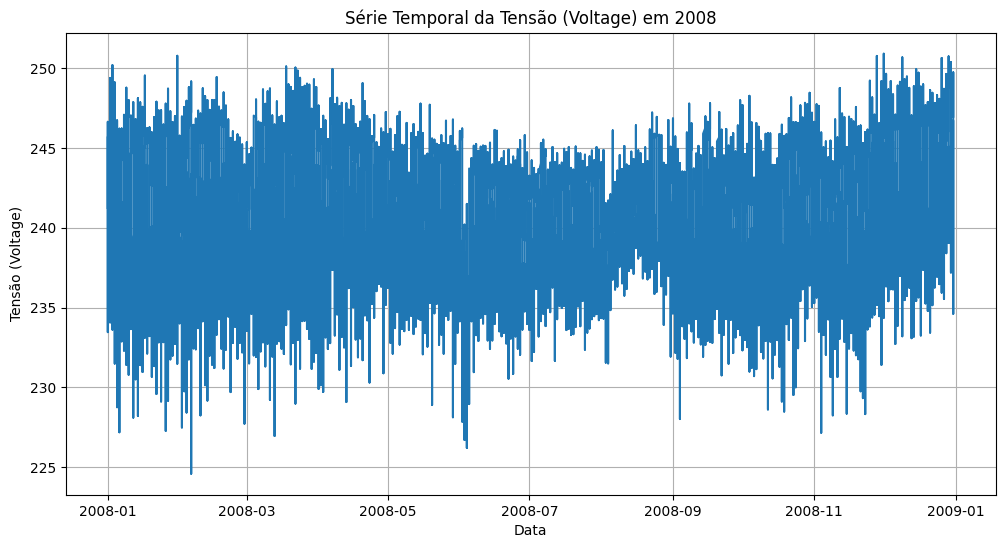

In [26]:
data_2008 = data[data['Date'].dt.year == 2008].copy()

data_2008['Date'] = pd.to_datetime(data_2008['Date'])
data_2008 = data_2008.set_index('Date')

plt.figure(figsize=(12, 6))
plt.plot(data_2008.index, data_2008['Voltage'])
plt.title('Série Temporal da Tensão (Voltage) em 2008')
plt.xlabel('Data')
plt.ylabel('Tensão (Voltage)')
plt.grid(True)
plt.show()

### 15 - Compare o consumo entre os meses de verão e inverno (no hemisfério norte)

In [27]:
meses_verao = [6, 7, 8]
meses_inverno = [12, 1, 2]

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)

data_verao = data[data['Date'].dt.month.isin(meses_verao)].copy()
data_inverno = data[data['Date'].dt.month.isin(meses_inverno)].copy()

data_verao['Global_active_power'] = pd.to_numeric(data_verao['Global_active_power'], errors='coerce')
data_inverno['Global_active_power'] = pd.to_numeric(data_inverno['Global_active_power'], errors='coerce')

data_verao.dropna(subset=['Global_active_power'], inplace=True)
data_inverno.dropna(subset=['Global_active_power'], inplace=True)

media_verao = data_verao['Global_active_power'].mean()
media_inverno = data_inverno['Global_active_power'].mean()

print(f"Consumo médio de Global_active_power no verão (HN): {media_verao:.2f} kW")
print(f"Consumo médio de Global_active_power no inverno (HN): {media_inverno:.2f} kW")

Consumo médio de Global_active_power no verão (HN): 0.73 kW
Consumo médio de Global_active_power no inverno (HN): 1.42 kW


### 16 - Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa

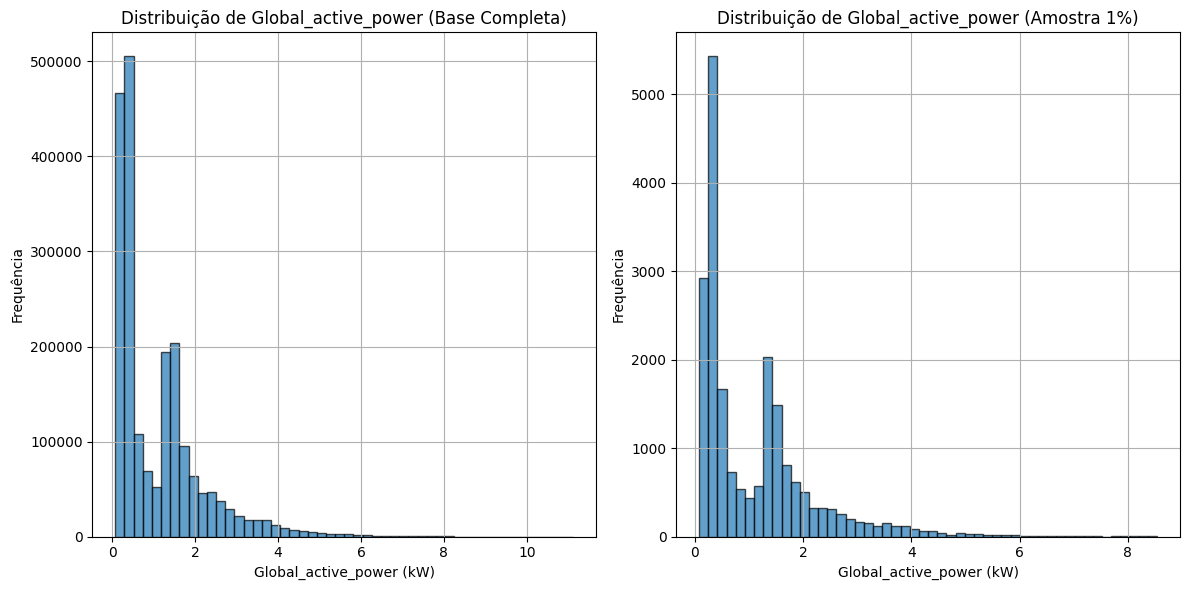

In [28]:
data_sample = data.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Global_active_power'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição de Global_active_power (Base Completa)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data_sample['Global_active_power'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição de Global_active_power (Amostra 1%)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')
plt.grid(True)

plt.tight_layout()
plt.show()

### 17 - Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.


In [29]:
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

scaler = MinMaxScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,AnoMes,Tipo_Dia,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,Fim de Semana,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,Fim de Semana,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,Fim de Semana,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,Fim de Semana,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,Fim de Semana,0.134328


### 18 - Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Sub_metering
Cluster,,,,,
0,137.290457,121.812618,0.575065,136.619014,99.791946
1,72.448293,129.477264,0.556134,75.637564,52.877206
2,212.790241,138.646914,0.578067,208.747777,149.915498


Interpretação dos Clusters:
Cluster 0: Baixo consumo geral, especialmente em potência ativa e intensidade.
Cluster 1: Alto consumo geral, com valores elevados em todas as métricas.
Cluster 2: Consumo moderado, intermediário entre os clusters 0 e 1.


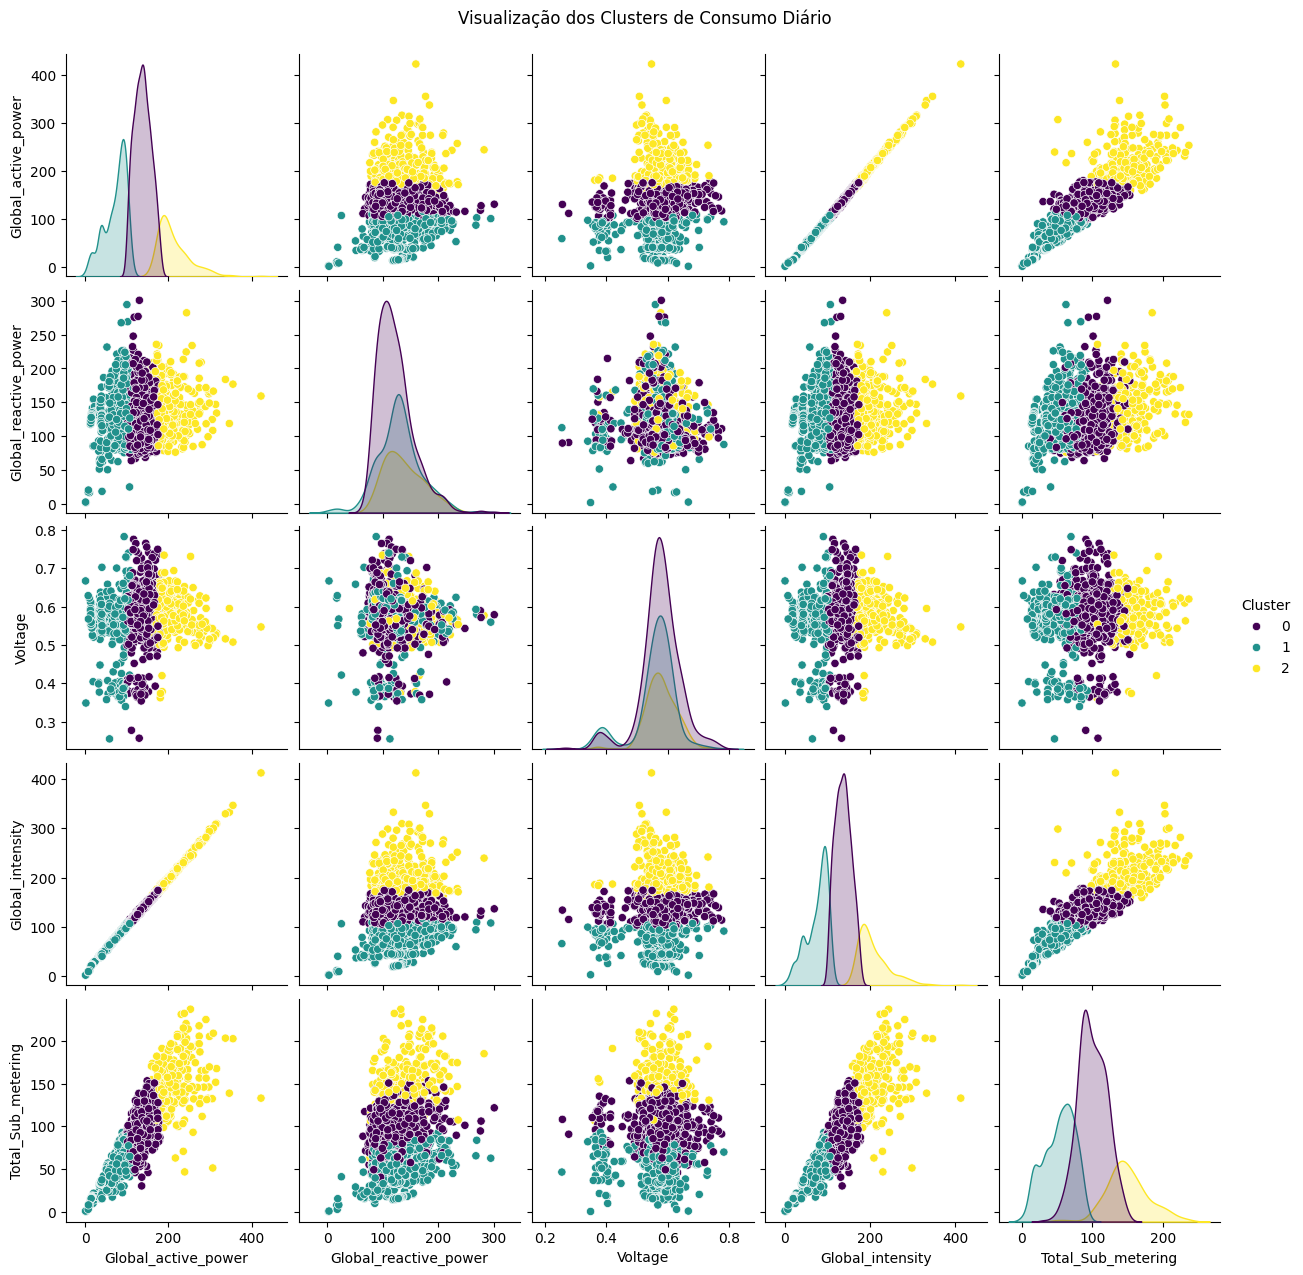


Conclusão da Análise de Clusters:
A aplicação do K-means com 3 clusters revelou três padrões distintos de consumo diário de energia:
- Um grupo de baixo consumo.
- Um grupo de alto consumo.
- Um grupo de consumo moderado.
Essa segmentação pode ser útil para entender diferentes perfis de dias em termos de uso de energia.


In [30]:
dados_diarios = data.groupby('Date').agg(
    Global_active_power=('Global_active_power', 'sum'),
    Global_reactive_power=('Global_reactive_power', 'sum'),
    Voltage=('Voltage', 'mean'),
    Global_intensity=('Global_intensity', 'sum'),
    Sub_metering_1=('Sub_metering_1', 'sum'),
    Sub_metering_2=('Sub_metering_2', 'sum'),
    Sub_metering_3=('Sub_metering_3', 'sum'),
    Total_Sub_metering=('Total_Sub_metering', 'sum')
).reset_index()

recursos_para_clustering = dados_diarios[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Total_Sub_metering']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dados_diarios['Cluster'] = kmeans.fit_predict(recursos_para_clustering)

analise_cluster = dados_diarios.groupby('Cluster')[recursos_para_clustering.columns].mean()
display(analise_cluster)

print("Interpretação dos Clusters:")
print("Cluster 0: Baixo consumo geral, especialmente em potência ativa e intensidade.")
print("Cluster 1: Alto consumo geral, com valores elevados em todas as métricas.")
print("Cluster 2: Consumo moderado, intermediário entre os clusters 0 e 1.")

sns.pairplot(dados_diarios, vars=recursos_para_clustering.columns, hue='Cluster', palette='viridis')
plt.suptitle('Visualização dos Clusters de Consumo Diário', y=1.02)
plt.show()

print("\nConclusão da Análise de Clusters:")
print("A aplicação do K-means com 3 clusters revelou três padrões distintos de consumo diário de energia:")
print("- Um grupo de baixo consumo.")
print("- Um grupo de alto consumo.")
print("- Um grupo de consumo moderado.")
print("Essa segmentação pode ser útil para entender diferentes perfis de dias em termos de uso de energia.")

### 19 - Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.


/tmp/ipython-input-1338744899.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_power = daily_power.fillna(method='ffill')


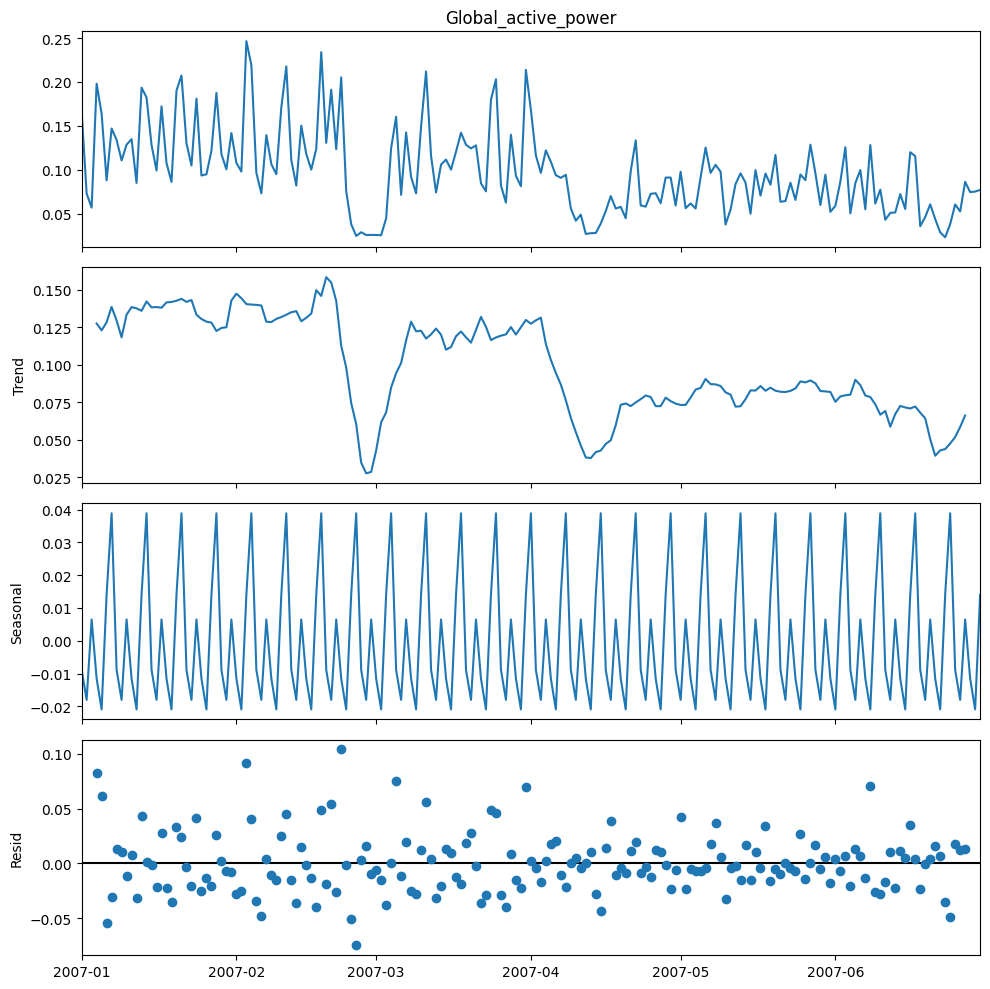

In [31]:
start_date = '2007-01-01'
end_date = '2007-06-30'

data['Date'] = pd.to_datetime(data['Date'])

data_subset = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)].copy()

data_subset = data_subset.set_index('Date')

daily_power = data_subset['Global_active_power'].resample('D').mean()

daily_power = daily_power.fillna(method='ffill')

decomposition_results = seasonal_decompose(daily_power, model='additive')

fig = decomposition_results.plot()
fig.set_size_inches((10, 10))
plt.tight_layout()
plt.show()

### 20 - Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo

In [32]:
X = data[['Global_intensity']].values
y = data['Global_active_power'].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_regressao = LinearRegression()
modelo_regressao.fit(X_treino, y_treino)

y_previsoes = modelo_regressao.predict(X_teste)

mae = mean_absolute_error(y_teste, y_previsoes)
mse = mean_squared_error(y_teste, y_previsoes)
rmse = np.sqrt(mse)

print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")

valores_ficticios_intensity = np.array([5.0, 10.0, 15.0, 20.0, 25.0]).reshape(-1, 1)

previsoes_ficticias_power = modelo_regressao.predict(valores_ficticios_intensity)

print("\nPrevisões para Valores Fictícios de Global_intensity:")
for intensity, power_pred in zip(valores_ficticios_intensity.flatten(), previsoes_ficticias_power):
    print(f"Global_intensity: {intensity:.2f}, Previsão de Global_active_power: {power_pred:.2f}")

Erro Médio Absoluto (MAE): 0.0030831887657296678
Erro Quadrático Médio (MSE): 2.0125188629674842e-05
Raiz do Erro Quadrático Médio (RMSE): 0.004486110635023933

Previsões para Valores Fictícios de Global_intensity:
Global_intensity: 5.00, Previsão de Global_active_power: 5.18
Global_intensity: 10.00, Previsão de Global_active_power: 10.37
Global_intensity: 15.00, Previsão de Global_active_power: 15.55
Global_intensity: 20.00, Previsão de Global_active_power: 20.73
Global_intensity: 25.00, Previsão de Global_active_power: 25.92


# Exercícios (21-25)

### 21 - Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

Horários de maior consumo médio ao longo do dia (em horas):
[20]


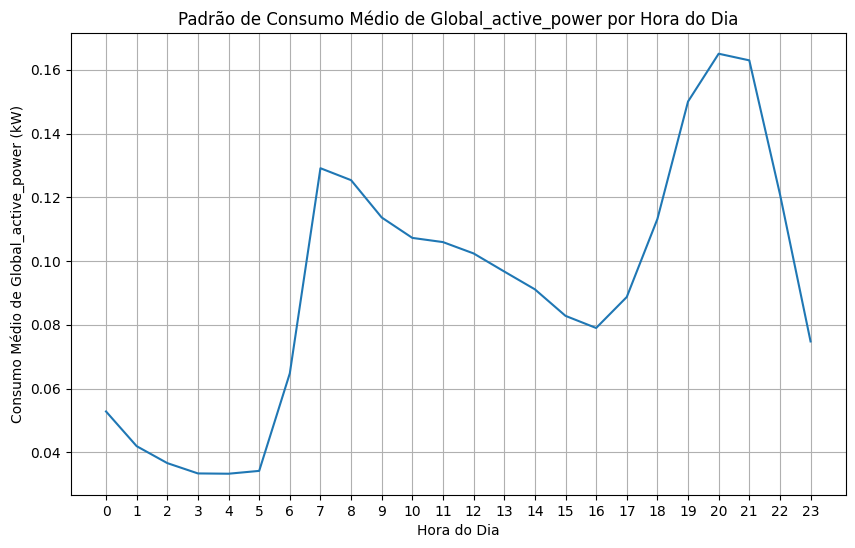


Conclusão da Análise de Série Temporal por Hora:
A análise do consumo médio por hora revela que os horários de pico são: [20]
Este padrão diário é útil para entender quando a demanda por energia é maior.


In [39]:
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'])
data = data.set_index('Datetime')

hourly_power = data['Global_active_power'].resample('h').mean()

hourly_pattern = hourly_power.groupby(hourly_power.index.hour).mean()

peak_hours = hourly_pattern[hourly_pattern == hourly_pattern.max()].index.tolist()

print("Horários de maior consumo médio ao longo do dia (em horas):")
print(peak_hours)


plt.figure(figsize=(10, 6))
hourly_pattern.plot()
plt.title('Padrão de Consumo Médio de Global_active_power por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio de Global_active_power (kW)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

print("\nConclusão da Análise de Série Temporal por Hora:")
print(f"A análise do consumo médio por hora revela que os horários de pico são: {peak_hours}")
print("Este padrão diário é útil para entender quando a demanda por energia é maior.")

### 22 - Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

Autocorrelação em lag de 1 hora (60 minutos): 0.4932
Autocorrelação em lag de 24 horas (1440 minutos): 0.3252
Autocorrelação em lag de 48 horas (2880 minutos): 0.2987

Resposta: Com base na autocorrelação em lag de 24 horas, não há evidências fortes de padrões repetidos diariamente no consumo de Global_active_power.


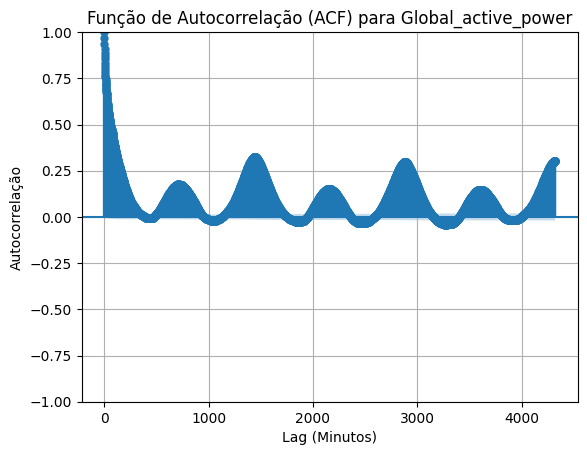


Conclusão da análise de autocorrelação:
A análise de autocorrelação nos lags especificados (1h, 24h, 48h) foi concluída.
A autocorrelação em lag de 24 horas é um indicador chave para padrões diários.


In [40]:

serie_power = data['Global_active_power']

lags_em_minutos = [1 * 60, 24 * 60, 48 * 60]

serie_power = serie_power.dropna()

valores_autocorr = acf(serie_power, nlags=max(lags_em_minutos), fft=True)[lags_em_minutos]

print(f"Autocorrelação em lag de 1 hora ({lags_em_minutos[0]} minutos): {valores_autocorr[0]:.4f}")
print(f"Autocorrelação em lag de 24 horas ({lags_em_minutos[1]} minutos): {valores_autocorr[1]:.4f}")
print(f"Autocorrelação em lag de 48 horas ({lags_em_minutos[2]} minutos): {valores_autocorr[2]:.4f}")


if valores_autocorr[1] > 0.5:
    print("\nResposta: Sim, a alta autocorrelação em lag de 24 horas sugere que existem padrões repetidos diariamente no consumo de Global_active_power.")
else:
    print("\nResposta: Com base na autocorrelação em lag de 24 horas, não há evidências fortes de padrões repetidos diariamente no consumo de Global_active_power.")


plot_acf(serie_power, lags=4320, alpha=0.05, fft=True)
plt.title('Função de Autocorrelação (ACF) para Global_active_power')
plt.xlabel('Lag (Minutos)')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()


print("\nConclusão da análise de autocorrelação:")
print("A análise de autocorrelação nos lags especificados (1h, 24h, 48h) foi concluída.")
print("A autocorrelação em lag de 24 horas é um indicador chave para padrões diários.")

### 23 - Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.


In [41]:
colunas_pca = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
dados_pca = data[colunas_pca]

dados_pca = dados_pca.dropna()

scaler = StandardScaler()
dados_pca_padronizados = scaler.fit_transform(dados_pca)

pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(dados_pca_padronizados)

componentes_df = pd.DataFrame(data = componentes_principais, columns = ['Componente Principal 1', 'Componente Principal 2'])

variancia_explicada = pca.explained_variance_ratio_

print("Variância explicada por cada componente principal:")
print(f"Componente Principal 1: {variancia_explicada[0]:.4f}")
print(f"Componente Principal 2: {variancia_explicada[1]:.4f}")
print(f"Variância Total Explicada: {variancia_explicada.sum():.4f}")

print("\nConclusão da Análise de PCA:")
print(f"A aplicação de PCA reduziu os dados para 2 componentes principais.")
print(f"O primeiro componente explica {variancia_explicada[0]:.2%} da variância total.")
print(f"O segundo componente explica {variancia_explicada[1]:.2%} da variância total.")
print(f"Juntos, os dois componentes explicam {variancia_explicada.sum():.2%} da variância total.")

Variância explicada por cada componente principal:
Componente Principal 1: 0.5910
Componente Principal 2: 0.2272
Variância Total Explicada: 0.8182

Conclusão da Análise de PCA:
A aplicação de PCA reduziu os dados para 2 componentes principais.
O primeiro componente explica 59.10% da variância total.
O segundo componente explica 22.72% da variância total.
Juntos, os dois componentes explicam 81.82% da variância total.


### 24 - Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

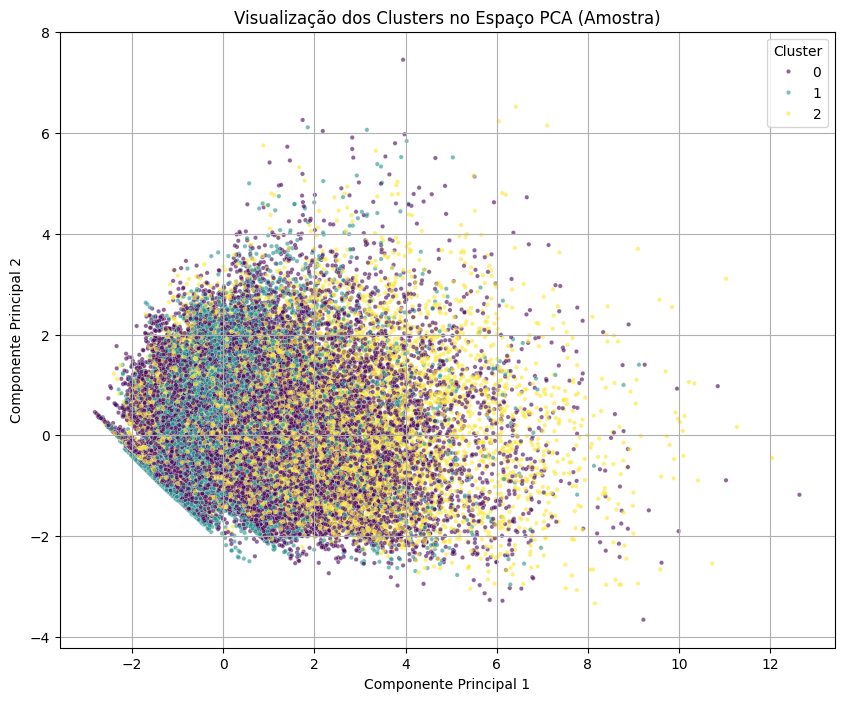

Conclusão da Visualização de Clusters no Espaço PCA:
A visualização dos clusters no espaço reduzido do PCA permite observar graficamente a separação dos grupos identificados pelo K-Means.


In [45]:
data['Date'] = pd.to_datetime(data['Date'])
dados_diarios['Date'] = pd.to_datetime(dados_diarios['Date'])


data_com_cluster_pca = pd.merge(
    data.reset_index(),
    dados_diarios[['Date', 'Cluster']],
    on='Date',
    how='left'
)

data_com_cluster_pca = data_com_cluster_pca.set_index('Datetime')

data_com_cluster_pca.dropna(subset=['Cluster'], inplace=True)

data_com_cluster_pca['Cluster'] = data_com_cluster_pca['Cluster'].astype(int)

colunas_pca = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
dados_originais_para_pca = data[colunas_pca].dropna()

scaler = StandardScaler()
dados_padronizados_para_pca = scaler.fit_transform(dados_originais_para_pca)

pca = PCA(n_components=2)
componentes_principais_para_plot = pca.fit_transform(dados_padronizados_para_pca)

dados_para_plotagem_pca = pd.DataFrame(data = componentes_principais_para_plot,
                                        columns = ['Componente Principal 1', 'Componente Principal 2'],
                                        index = dados_originais_para_pca.index)

dados_para_plotagem_pca_com_cluster = dados_para_plotagem_pca.join(data_com_cluster_pca['Cluster'])

dados_para_plotagem_pca_com_cluster.dropna(subset=['Cluster'], inplace=True)

dados_para_plotagem_pca_com_cluster['Cluster'] = dados_para_plotagem_pca_com_cluster['Cluster'].astype(int)

dados_para_plotagem_pca_com_cluster_sample = dados_para_plotagem_pca_com_cluster.sample(frac=0.05, random_state=42)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', data=dados_para_plotagem_pca_com_cluster_sample, palette='viridis', s=10, alpha=0.6)
plt.title('Visualização dos Clusters no Espaço PCA (Amostra)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

print("Conclusão da Visualização de Clusters no Espaço PCA:")
print("A visualização dos clusters no espaço reduzido do PCA permite observar graficamente a separação dos grupos identificados pelo K-Means.")

### - 25 Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada

RMSE (Regressão Linear): 0.0880
RMSE (Regressão Polinomial - Grau 2): 0.0876


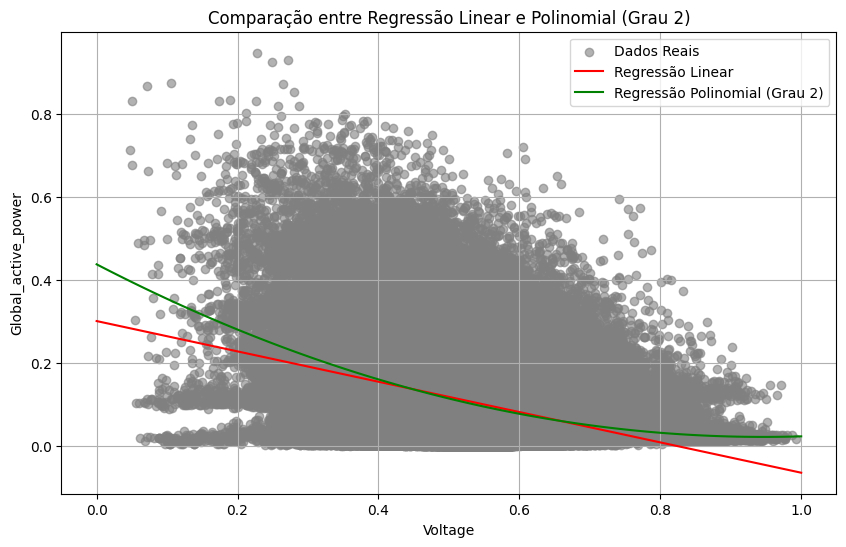


Análise dos Resultados:
A Regressão Polinomial (Grau 2) teve um RMSE menor, indicando um ajuste melhor aos dados em comparação com a Regressão Linear Simples.
Visualmente, a curva polinomial parece capturar melhor a relação entre as variáveis, especialmente se a relação não for estritamente linear.

Conclusão da Comparação de Modelos:
Com base no RMSE, a Regressão Polinomial (Grau 2) obteve um erro de 0.0876, enquanto a Regressão Linear Simples obteve um erro de 0.0880.
A visualização da curva ajustada ajuda a entender a natureza da relação entre Global_active_power e Voltage.


In [44]:
X = data[['Voltage']].values
y = data['Global_active_power'].values

data_cleaned = data.dropna(subset=['Voltage', 'Global_active_power'])
X = data_cleaned[['Voltage']].values
y = data_cleaned['Global_active_power'].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


modelo_linear = LinearRegression()
modelo_linear.fit(X_treino, y_treino)

poly_features = PolynomialFeatures(degree=2)
X_treino_poly = poly_features.fit_transform(X_treino)
X_teste_poly = poly_features.transform(X_teste)

modelo_polinomial = LinearRegression()
modelo_polinomial.fit(X_treino_poly, y_treino)

y_previsoes_linear = modelo_linear.predict(X_teste)
y_previsoes_polinomial = modelo_polinomial.predict(X_teste_poly)

rmse_linear = np.sqrt(mean_squared_error(y_teste, y_previsoes_linear))
rmse_polinomial = np.sqrt(mean_squared_error(y_teste, y_previsoes_polinomial))

print(f"RMSE (Regressão Linear): {rmse_linear:.4f}")
print(f"RMSE (Regressão Polinomial - Grau 2): {rmse_polinomial:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_teste, y_teste, color='gray', label='Dados Reais', alpha=0.6)

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

y_plot_linear = modelo_linear.predict(X_plot)
plt.plot(X_plot, y_plot_linear, color='red', label='Regressão Linear')

X_plot_poly = poly_features.transform(X_plot)
y_plot_polinomial = modelo_polinomial.predict(X_plot_poly)
plt.plot(X_plot, y_plot_polinomial, color='green', label='Regressão Polinomial (Grau 2)')

plt.title('Comparação entre Regressão Linear e Polinomial (Grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()


print("\nAnálise dos Resultados:")
if rmse_polinomial < rmse_linear:
    print("A Regressão Polinomial (Grau 2) teve um RMSE menor, indicando um ajuste melhor aos dados em comparação com a Regressão Linear Simples.")
    print("Visualmente, a curva polinomial parece capturar melhor a relação entre as variáveis, especialmente se a relação não for estritamente linear.")
elif rmse_linear < rmse_polinomial:
     print("A Regressão Linear Simples teve um RMSE menor, indicando um ajuste melhor aos dados em comparação com a Regressão Polinomial (Grau 2).")
     print("Visualmente, a relação entre as variáveis parece ser mais próxima de linear.")
else:
    print("O RMSE dos dois modelos é muito similar. A Regressão Linear Simples pode ser preferível devido à sua simplicidade, a menos que a visualização sugira claramente um padrão não linear que a polinomial captura.")

print("\nConclusão da Comparação de Modelos:")
print(f"Com base no RMSE, a Regressão Polinomial (Grau 2) obteve um erro de {rmse_polinomial:.4f}, enquanto a Regressão Linear Simples obteve um erro de {rmse_linear:.4f}.")
print("A visualização da curva ajustada ajuda a entender a natureza da relação entre Global_active_power e Voltage.")

# Exercícios (26-35)

### 26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

Consumir pelo runtime

In [46]:
data = pd.read_csv('/content/energydata_complete.csv')
data.info()

FileNotFoundError: [Errno 2] No such file or directory: '/content/energydata_complete.csv'

Consumir pelo drive

In [47]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/_2sem_ia/Datasets/energydata_complete.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [48]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### 27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

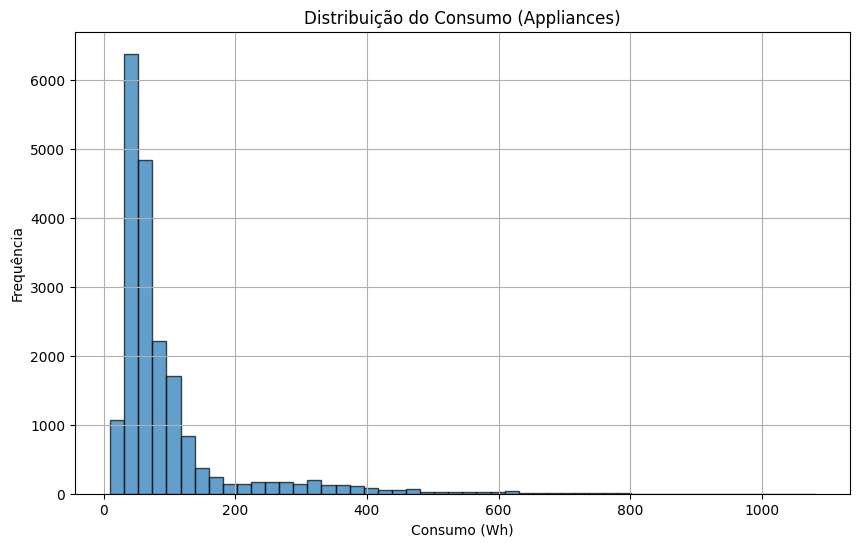

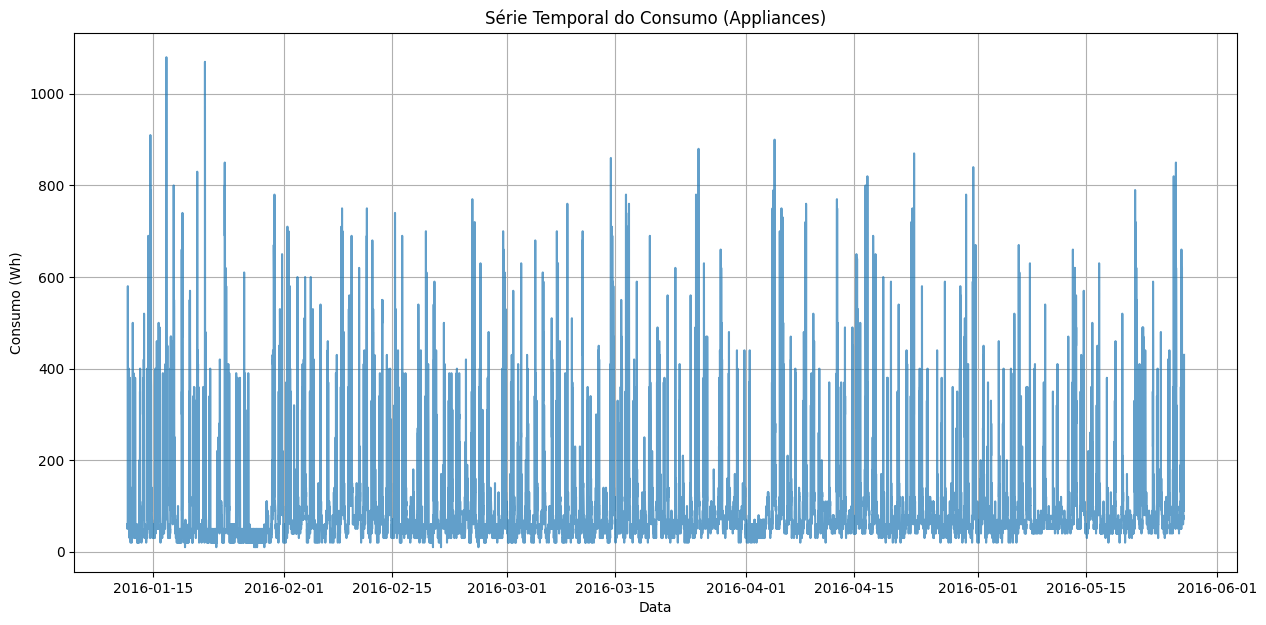


Análise da Distribuição do Consumo (Appliances):
Observando o histograma, podemos ver a distribuição da frequência dos valores de consumo.
Observando a série temporal, podemos ver a variação do consumo ao longo do tempo.


In [49]:
plt.figure(figsize=(10, 6))
plt.hist(data['Appliances'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribuição do Consumo (Appliances)')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Appliances'], alpha=0.7)
plt.title('Série Temporal do Consumo (Appliances)')
plt.xlabel('Data')
plt.ylabel('Consumo (Wh)')
plt.grid(True)
plt.show()

print("\nAnálise da Distribuição do Consumo (Appliances):")
print("Observando o histograma, podemos ver a distribuição da frequência dos valores de consumo.")
print("Observando a série temporal, podemos ver a variação do consumo ao longo do tempo.")

Analisando os gráficos gerados, o histograma mostra que a frequência de consumo é maior em valores baixos, com um pico significativo. A série temporal exibe picos de consumo ao longo do tempo, mas a maior parte dos dados se concentra em níveis mais baixos. Portanto, o consumo tende a se concentrar em valores baixos.

### 28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [50]:
environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                      'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                      'RH_out', 'Tdewpoint', 'Press_mm_hg', 'Windspeed', 'Visibility']

correlations = data[environmental_cols + ['Appliances']].corr()['Appliances'].sort_values(ascending=False)

display(correlations)

print("\nAnálise das Correlações:")
print("Observando os valores de correlação, quanto mais próximo de 1 (correlação positiva forte) ou -1 (correlação negativa forte), maior a relação da variável com o consumo de Appliances.")
print("Valores próximos de 0 indicam pouca ou nenhuma relação linear.")

,Appliances
Appliances,1.000000
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
T8,0.039572



Análise das Correlações:
Observando os valores de correlação, quanto mais próximo de 1 (correlação positiva forte) ou -1 (correlação negativa forte), maior a relação da variável com o consumo de Appliances.
Valores próximos de 0 indicam pouca ou nenhuma relação linear.


Com base nos resultados da correlação, as variáveis ambientais com maior relação (correlação mais próxima de 1 ou -1) com o consumo de Appliances são:

T2 (Temperatura na Sala de Estar): Correlação positiva de aproximadamente 0.1201.

T6 (Temperatura Exterior (Sensor)): Correlação positiva de aproximadamente 0.1176.

T_out (Temperatura Exterior (Estação Meteorológica)): Correlação positiva de aproximadamente 0.0992.

RH_out (Umidade Exterior (Estação Meteorológica)): Correlação negativa de aproximadamente -0.1523.

### 29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [51]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

scaler = MinMaxScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

display(data.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


### 30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais

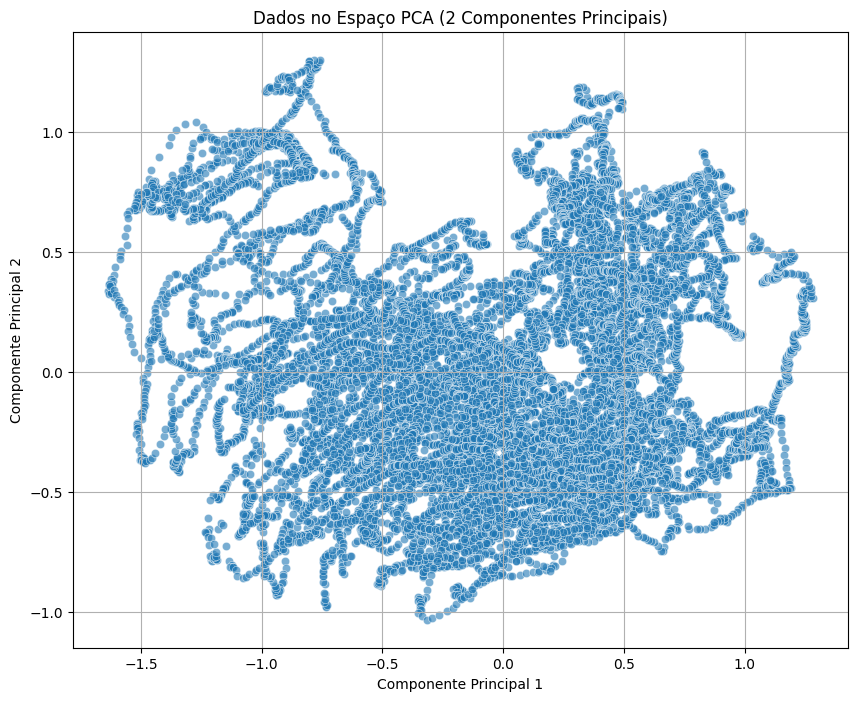


Análise Visual dos Dados no Espaço PCA:
Observe o gráfico acima. Se os pontos formam aglomerados distintos ou padrões visuais, isso pode indicar a presença de agrupamentos naturais nos dados após a redução de dimensionalidade.

Variância explicada por cada componente principal:
Componente Principal 1: 0.3609
Componente Principal 2: 0.2091
Variância Total Explicada pelos 2 componentes: 0.5700


In [52]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data_for_pca = data[numerical_cols]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_for_pca)

principal_df = pd.DataFrame(data = principal_components, columns = ['Componente Principal 1', 'Componente Principal 2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', data=principal_df, alpha=0.6)
plt.title('Dados no Espaço PCA (2 Componentes Principais)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

print("\nAnálise Visual dos Dados no Espaço PCA:")
print("Observe o gráfico acima. Se os pontos formam aglomerados distintos ou padrões visuais, isso pode indicar a presença de agrupamentos naturais nos dados após a redução de dimensionalidade.")

print("\nVariância explicada por cada componente principal:")
print(f"Componente Principal 1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Componente Principal 2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Variância Total Explicada pelos 2 componentes: {pca.explained_variance_ratio_.sum():.4f}")

Analisando o gráfico gerado, não observamos agrupamentos distintos e claramente separados no espaço PCA. Os pontos parecem formar uma estrutura mais contínua. A variância total explicada pelos dois componentes principais é de aproximadamente 57.00%, o que significa que esses dois componentes capturam cerca de 57% da informação original nos dados.

### 31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [53]:
environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                      'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                      'RH_out', 'Tdewpoint', 'Press_mm_hg', 'Windspeed', 'Visibility']

X = data[environmental_cols]
y = data['Appliances']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_regressao_multipla = LinearRegression()
modelo_regressao_multipla.fit(X_treino, y_treino)

y_previsoes = modelo_regressao_multipla.predict(X_teste)

r2 = r2_score(y_teste, y_previsoes)
mae = mean_absolute_error(y_teste, y_previsoes)

print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae:.4f}")

print("\nAnálise do Desempenho do Modelo:")
print("O coeficiente R² indica a proporção da variância na variável dependente (Appliances) que é previsível a partir das variáveis independentes (ambientais). Um valor mais próximo de 1 indica um ajuste melhor.")
print("O Erro Médio Absoluto (MAE) representa a média das diferenças absolutas entre os valores previstos e os valores reais. Um MAE menor indica um erro menor.")

print("\nConclusão da Regressão Linear Múltipla:")
print(f"O modelo de regressão linear múltipla foi treinado e avaliado.")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")

Coeficiente de Determinação (R²): 0.1459
Erro Médio Absoluto (MAE): 0.0499

Análise do Desempenho do Modelo:
O coeficiente R² indica a proporção da variância na variável dependente (Appliances) que é previsível a partir das variáveis independentes (ambientais). Um valor mais próximo de 1 indica um ajuste melhor.
O Erro Médio Absoluto (MAE) representa a média das diferenças absolutas entre os valores previstos e os valores reais. Um MAE menor indica um erro menor.

Conclusão da Regressão Linear Múltipla:
O modelo de regressão linear múltipla foi treinado e avaliado.
R²: 0.1459
MAE: 0.0499


O modelo de regressão linear múltipla foi treinado e avaliado. Obtivemos um Coeficiente de Determinação (R²) de aproximadamente 0.1459 e um Erro Médio Absoluto (MAE) de aproximadamente 0.0499.

Um R² de 0.1459 indica que aproximadamente 14.6% da variância no consumo de Appliances pode ser explicada pelas variáveis ambientais neste modelo linear. Este valor de R² sugere que as variáveis ambientais, por si só, não são preditores muito fortes do consumo de energia neste modelo linear simples. O MAE de 0.0499 representa o erro médio absoluto das previsões na escala normalizada. Para interpretar este erro em termos de consumo real (Wh), precisaríamos desnormalizar o MAE.

### 32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear

In [54]:
environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                      'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                      'RH_out', 'Tdewpoint', 'Press_mm_hg', 'Windspeed', 'Visibility']

X = data[environmental_cols]
y = data['Appliances']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


modelo_linear = LinearRegression()
modelo_linear.fit(X_treino, y_treino)
y_previsoes_linear = modelo_linear.predict(X_teste)
rmse_linear = np.sqrt(mean_squared_error(y_teste, y_previsoes_linear))


modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_random_forest.fit(X_treino, y_treino)
y_previsoes_rf = modelo_random_forest.predict(X_teste)
rmse_random_forest = np.sqrt(mean_squared_error(y_teste, y_previsoes_rf))


print(f"RMSE (Regressão Linear): {rmse_linear:.4f}")
print(f"RMSE (Random Forest Regressor): {rmse_random_forest:.4f}")

print("\nComparação de RMSE:")
if rmse_random_forest < rmse_linear:
    print("O Random Forest Regressor obteve um RMSE menor, indicando um desempenho de previsão superior em comparação com a Regressão Linear.")
elif rmse_linear < rmse_random_forest:
    print("A Regressão Linear obteve um RMSE menor em comparação com o Random Forest Regressor.")
else:
    print("O RMSE dos dois modelos é muito similar.")

print("\nConclusão do Treinamento do Random Forest Regressor:")
print(f"O modelo Random Forest Regressor foi treinado e avaliado.")
print(f"RMSE do Random Forest: {rmse_random_forest:.4f}")
print(f"RMSE da Regressão Linear: {rmse_linear:.4f}")

RMSE (Regressão Linear): 0.0864
RMSE (Random Forest Regressor): 0.0588

Comparação de RMSE:
O Random Forest Regressor obteve um RMSE menor, indicando um desempenho de previsão superior em comparação com a Regressão Linear.

Conclusão do Treinamento do Random Forest Regressor:
O modelo Random Forest Regressor foi treinado e avaliado.
RMSE do Random Forest: 0.0588
RMSE da Regressão Linear: 0.0864


O Random Forest Regressor obteve um RMSE de aproximadamente 0.0588, enquanto a Regressão Linear Simples obteve um RMSE de aproximadamente 0.0864. Com base no RMSE, o Random Forest Regressor teve um desempenho de previsão superior neste caso.

### 33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,0.091612,0.033320,0.690972,0.391746,0.474135,0.554040,0.603089,0.471597,0.718858,0.498484,...,0.716212,0.518177,0.583278,0.585252,0.599759,0.268233,0.553962,0.622476,0.494396,0.494396
1,0.075826,0.052919,0.443548,0.296596,0.208192,0.529522,0.348582,0.401714,0.452907,0.361697,...,0.410752,0.410898,0.285580,0.642092,0.766123,0.230830,0.580460,0.339636,0.503257,0.503257
2,0.080943,0.084097,0.429575,0.455424,0.281079,0.629661,0.321035,0.677475,0.381940,0.699020,...,0.296516,0.696041,0.373187,0.581229,0.845790,0.422946,0.589180,0.511757,0.500081,0.500081



Interpretação dos Perfis de Consumo por Cluster:
Analisando as médias das variáveis para cada cluster, podemos tentar descrever o perfil de consumo característico de cada grupo.
Por exemplo, um cluster pode ter médias mais altas para variáveis relacionadas ao consumo de energia (Appliances, lights) e certas condições ambientais.


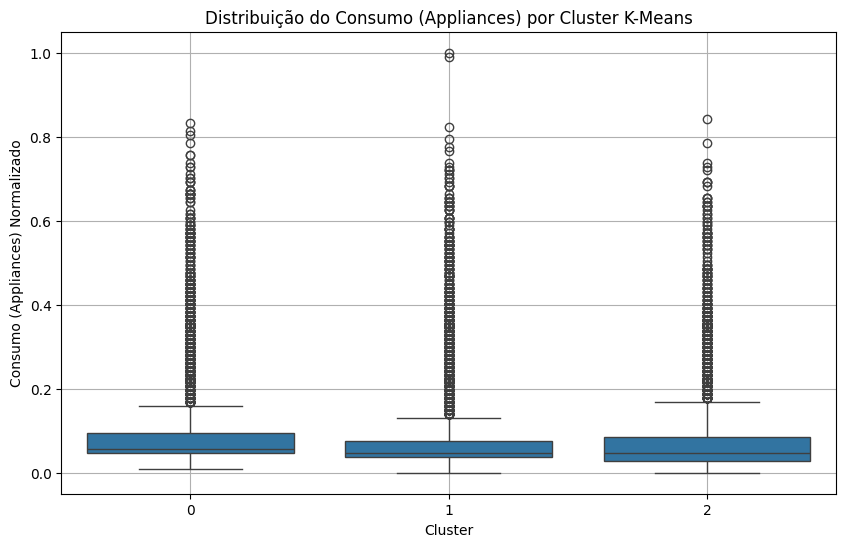


Conclusão da Análise de K-Means Clustering:
O K-Means clustering foi aplicado e os perfis médios de cada cluster foram calculados.
A análise desses perfis e a visualização da distribuição de consumo por cluster ajudam a entender como os dias ou períodos de tempo se agrupam com base em seus padrões de consumo e condições ambientais.


In [55]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data_for_clustering = data[numerical_cols]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster_KMeans'] = kmeans.fit_predict(data_for_clustering)

cluster_profiles = data.groupby('Cluster_KMeans')[numerical_cols].mean()

display(cluster_profiles)

print("\nInterpretação dos Perfis de Consumo por Cluster:")
print("Analisando as médias das variáveis para cada cluster, podemos tentar descrever o perfil de consumo característico de cada grupo.")
print("Por exemplo, um cluster pode ter médias mais altas para variáveis relacionadas ao consumo de energia (Appliances, lights) e certas condições ambientais.")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_KMeans', y='Appliances', data=data)
plt.title('Distribuição do Consumo (Appliances) por Cluster K-Means')
plt.xlabel('Cluster')
plt.ylabel('Consumo (Appliances) Normalizado')
plt.grid(True)
plt.show()

print("\nConclusão da Análise de K-Means Clustering:")
print("O K-Means clustering foi aplicado e os perfis médios de cada cluster foram calculados.")
print("A análise desses perfis e a visualização da distribuição de consumo por cluster ajudam a entender como os dias ou períodos de tempo se agrupam com base em seus padrões de consumo e condições ambientais.")

### 34 - Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [56]:
median_appliances = data['Appliances'].median()
data['Consumo_Alto'] = (data['Appliances'] > median_appliances).astype(int)

environmental_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                      'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                      'RH_out', 'Tdewpoint', 'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1', 'rv2']

X = data[environmental_cols]
y = data['Consumo_Alto']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


modelo_logistico = LogisticRegression(random_state=42, solver='liblinear')
modelo_logistico.fit(X_treino, y_treino)

modelo_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_random_forest.fit(X_treino, y_treino)


y_previsoes_logistico = modelo_logistico.predict(X_teste)

acuracia_logistico = accuracy_score(y_teste, y_previsoes_logistico)
precisao_logistico = precision_score(y_teste, y_previsoes_logistico)
recall_logistico = recall_score(y_teste, y_previsoes_logistico)
f1_logistico = f1_score(y_teste, y_previsoes_logistico)
matriz_confusao_logistico = confusion_matrix(y_teste, y_previsoes_logistico)


y_previsoes_rf = modelo_random_forest.predict(X_teste)

acuracia_rf = accuracy_score(y_teste, y_previsoes_rf)
precisao_rf = precision_score(y_teste, y_previsoes_rf)
recall_rf = recall_score(y_teste, y_previsoes_rf)
f1_rf = f1_score(y_teste, y_previsoes_rf)
matriz_confusao_rf = confusion_matrix(y_teste, y_previsoes_rf)

print("Resultados da Regressão Logística:")
print(f"Acurácia: {acuracia_logistico:.4f}")
print(f"Precisão: {precisao_logistico:.4f}")
print(f"Recall: {recall_logistico:.4f}")
print(f"F1-Score: {f1_logistico:.4f}")
print("Matriz de Confusão:")
display(matriz_confusao_logistico)

print("\nResultados do Random Forest Classifier:")
print(f"Acurácia: {acuracia_rf:.4f}")
print(f"Precisão: {precisao_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Matriz de Confusão:")
display(matriz_confusao_rf)


print("\nConclusão da Classificação Binária:")
print("Dois modelos de classificação (Regressão Logística e Random Forest Classifier) foram treinados para prever se o consumo de energia é alto ou baixo.")
print("As métricas de avaliação (Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão) para cada modelo foram calculadas e exibidas.")
print("Compare as métricas para determinar qual modelo teve o melhor desempenho para este problema de classificação.")

Resultados da Regressão Logística:
Acurácia: 0.7393
Precisão: 0.7084
Recall: 0.7269
F1-Score: 0.7175
Matriz de Confusão:


array([[1611,  538],
       [ 491, 1307]])


Resultados do Random Forest Classifier:
Acurácia: 0.8979
Precisão: 0.9006
Recall: 0.8721
F1-Score: 0.8861
Matriz de Confusão:


array([[1976,  173],
       [ 230, 1568]])


Conclusão da Classificação Binária:
Dois modelos de classificação (Regressão Logística e Random Forest Classifier) foram treinados para prever se o consumo de energia é alto ou baixo.
As métricas de avaliação (Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão) para cada modelo foram calculadas e exibidas.
Compare as métricas para determinar qual modelo teve o melhor desempenho para este problema de classificação.


### 35 - Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [9]:
print("Resultados da Regressão Logística:")
matriz_confusao_logistico = confusion_matrix(y_teste, y_previsoes_logistico)
acuracia_logistico = accuracy_score(y_teste, y_previsoes_logistico)
precisao_logistico = precision_score(y_teste, y_previsoes_logistico)
recall_logistico = recall_score(y_teste, y_previsoes_logistico)
f1_logistico = f1_score(y_teste, y_previsoes_logistico)

print(f"Acurácia: {acuracia_logistico:.4f}")
print(f"Precisão: {precisao_logistico:.4f}")
print(f"Recall: {recall_logistico:.4f}")
print(f"F1-Score: {f1_logistico:.4f}")
print("Matriz de Confusão:")
display(matriz_confusao_logistico)

print("\nResultados do Random Forest Classifier:")
matriz_confusao_rf = confusion_matrix(y_teste, y_previsoes_rf)
acuracia_rf = accuracy_score(y_teste, y_previsoes_rf)
precisao_rf = precision_score(y_teste, y_previsoes_rf)
recall_rf = recall_score(y_teste, y_previsoes_rf)
f1_rf = f1_score(y_teste, y_previsoes_rf)

print(f"Acurácia: {acuracia_rf:.4f}")
print(f"Precisão: {precisao_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Matriz de Confusão:")
display(matriz_confusao_rf)

Resultados da Regressão Logística:
Acurácia: 0.7411
Precisão: 0.7134
Recall: 0.7214
F1-Score: 0.7174
Matriz de Confusão:


array([[1628,  521],
       [ 501, 1297]])


Resultados do Random Forest Classifier:
Acurácia: 0.8971
Precisão: 0.8995
Recall: 0.8715
F1-Score: 0.8853
Matriz de Confusão:


array([[1974,  175],
       [ 231, 1567]])

O modelo de Regressão Logística tem uma leve tendência a errar mais prevendo alto consumo onde não ocorre.

O modelo Random Forest Classifier tem uma tendência mais clara a errar mais prevendo baixo consumo onde ocorre alto consumo.